In [1]:
!pip install wordcloud

In [2]:
import pandas as pd 
import numpy as np

#downloading stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import seaborn as sns
nltk.download('wordnet')
#cleaing text using regex
import re
from wordcloud import WordCloud
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from collections import Counter

[nltk_data] Downloading package stopwords to C:\Users\Reby
[nltk_data]     Varghese\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Reby
[nltk_data]     Varghese\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data=pd.read_csv('TheSocialDilemma.csv')
print(data.shape)
data.head()

(20068, 14)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


In [4]:
data=data[['text', 'Sentiment']]
data.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive
3,I watched #TheSocialDilemma last night. I’m sc...,Negative
4,The problem of me being on my phone most the t...,Positive


In [5]:
data.iloc[10]

text         Okey okey, I’ve been peer pressured into watch...
Sentiment                                             Positive
Name: 10, dtype: object

In [6]:
data['Sentiment'].value_counts()

Positive    9513
Neutral     6982
Negative    3573
Name: Sentiment, dtype: int64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


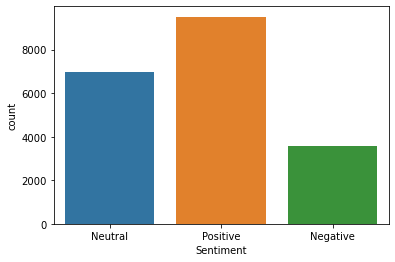

In [7]:
sns.countplot(data['Sentiment'])

In [8]:
data.text.values
text_data=" ".join(data.text.values)
text_data

'@musicmadmarc @SocialDilemma_ @netflix @Facebook I\'m also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K @musicmadmarc @SocialDilemma_ @netflix @Facebook haa, hey Marc. I get what you\'re saying &amp; don\'t agree. 🤪\n\nWhicheve… https://t.co/nsVtPHjUs8 Go watch “The Social Dilemma” on Netflix!\n\nIt’s the best 100 minutes you’ll spend in 2020. I bet you💯… https://t.co/GSWCx3E9tG I watched #TheSocialDilemma last night. I’m scared for humanity. \n\nI’m not sure what to do but I’ve logged out of F… https://t.co/luOBcjCJFb The problem of me being on my phone most the time while trying to watch #TheSocialDilemma 🤦🏼\u200d♀️ #TheSocialDilemma 😳 wow!! We need regulations on social media platforms and quick!! @harari_yuval what do you think about #TheSocialDilemma @ Netflix Erm #TheSocialDilemma makes me want to go off grid and live in a cave with a tinfoil hat. I mean obviously after I’… https://t.co/AQhtCoQR77 #TheSocialDilemma is not a documentary, it\'

In [9]:

#downloading stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
#cleaing text using regex
import re


[nltk_data] Downloading package stopwords to C:\Users\Reby
[nltk_data]     Varghese\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Reby
[nltk_data]     Varghese\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def clean_text(text):
  text=str(text)
  text=text.lower()
  text=text.strip()
  text = [re.sub('[^a-zA-Z.]',"", Word) for Word in text.split()]
  english_words=set(stopwords.words('english'))
  word_stemmer=SnowballStemmer('english')
  lemetizer=WordNetLemmatizer()

  word=[Word for Word in text if Word not in english_words]
  word=[word_stemmer.stem(Word) for Word in word]
  word=[lemetizer.lemmatize(Word) for Word in word]

  new_text=" ".join(word)

  return new_text

In [11]:
import re

text = u'This is a smiley face \U0001f602'
print(text) # with emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(text))

This is a smiley face 😂
This is a smiley face 


In [12]:
def display(df):
  text = " ".join(cat for cat in df['text'])
  cleaned_text=clean_text(text)
  occurence=Counter(cleaned_text.split())
  print(occurence)

  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(cleaned_text)
  plt.imshow(word_cloud)
  plt.show()

Counter({'thesocialdilemma': 6339, 'watch': 3961, 'social': 3879, 'netflix': 2027, 'medium': 1926, 'dilemma': 1193, 'documentari': 982, 'recommend': 535, 'im': 532, 'netflix.': 485, 'realli': 483, '.': 476, 'must': 470, 'everyon': 458, 'use': 442, 'peopl': 442, 'need': 421, 'high': 397, 'like': 388, 'one': 385, 'good': 374, 'think': 367, 'time': 357, 'see': 351, 'make': 350, 'u': 346, 'go': 343, 'great': 338, 'amp': 333, 'ourpact': 333, 'kid': 313, 'thing': 306, 'twitter': 306, 'import': 303, 'know': 301, 'right': 294, 'new': 288, 'keep': 287, 'dont': 281, 'interest': 278, 'much': 275, 'thesocialdilemma.': 274, 'onlin': 257, 'get': 255, 'media.': 247, 'safe': 244, 'tech': 238, 'want': 231, 'thought': 229, 'it.': 226, 'eye': 225, 'worth': 217, 'mani': 217, 'delet': 213, 'product': 210, 'facebook': 207, 'world': 202, 'plea': 200, 'take': 197, 'post': 195, 'tweet': 193, 'watch.': 193, 'ive': 192, 'finish': 190, 'chang': 188, 'iron': 186, 'open': 185, 'million': 185, 'seen': 181, 'love': 1

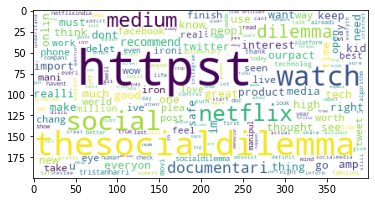

In [13]:
display(data[data['Sentiment']=='Positive'])

Counter({'thesocialdilemma': 2394, 'watch': 1277, 'social': 899, 'netflix': 598, 'medium': 530, 'scari': 247, 'two': 246, 'im': 241, 'user': 241, 'drug': 238, 'industri': 236, 'illeg': 234, 'news': 231, 'time': 231, 'custom': 230, 'call': 222, 'twitter': 215, 'documentari': 212, 'dilemma': 199, 'fake': 179, 'like': 177, 'peopl': 175, 'know': 163, 'think': 157, 'must': 142, 'amp': 141, 'software.': 141, 'go': 137, 'everyon': 133, 'make': 128, 'u': 127, 'get': 127, 'facebook': 126, 'need': 126, 'netflix.': 125, 'fuck': 122, 'addict': 119, 'faster': 118, 'feel': 115, 'thesocialdilemma.': 115, '.': 113, 'dont': 111, 'want': 110, 'spread': 108, 'technolog': 104, 'terrifi': 104, 'realli': 101, 'edward': 101, 'serious': 100, 'tech': 100, 'one': 99, 'phone': 98, 'shit': 97, 'recommend': 96, 'see': 96, 'say': 94, 'use': 93, 'true': 85, 'tuft': 85, 'delet': 84, 'bad': 82, 'thing': 82, 'softwar': 80, 'it.': 79, 'truth': 77, 'world': 75, 'ive': 71, 'last': 68, 'tweet': 67, 'even': 67, 'manipul': 6

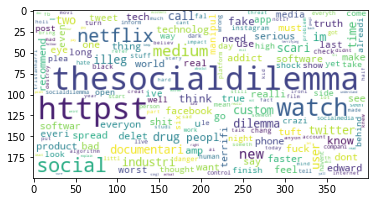

In [14]:
display(data[data['Sentiment']=='Negative'])

Counter({'thesocialdilemma': 5804, 'watch': 3214, 'netflix': 1440, 'product': 647, 'must': 505, 'your': 476, 'pay': 460, 'dont': 377, 'know': 376, 'documentari': 342, 'everyon': 333, 'need': 291, 'im': 283, 'twitter': 274, 'product.': 264, 'like': 258, 'matrix': 253, 'go': 248, 'facebook': 233, 'netflix.': 224, 'think': 216, 'thesocialdilemma.': 199, 'peopl': 198, 'get': 196, 'u': 196, 'time': 192, 'amp': 191, 'plea': 191, 'see': 182, '.': 181, 'recommend': 165, 'wake': 165, 'make': 160, 'one': 158, 'use': 158, 'phone': 156, 'tweet': 148, 'want': 148, 'socialdilemma': 145, 'it.': 141, 'tristanharri': 140, 'tech': 138, 'technolog': 137, 'delet': 133, 'last': 131, 'check': 127, 'ironi': 121, 'notif': 119, 'thing': 119, 'netflixindia': 118, 'finish': 115, 'havent': 114, 'algorithm': 109, 'turn': 109, 'say': 103, 'feel': 102, 'let': 102, 'eye': 102, 'thought': 101, 'seen': 101, 'instagram': 100, 'even': 100, 'alreadi': 98, 'yet': 97, 'also': 95, 'ive': 95, 'socialmedia': 94, 'googl': 94, '

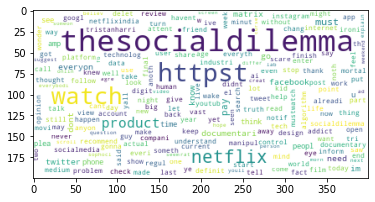

In [15]:
display(data[data['Sentiment']=='Neutral'])

In [16]:
class CleanEmojiTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
      if type(X) == str :
        return [deEmojify(X)]
      else:
        result= [deEmojify(text) for text in X]
        return result
   def fit(self, X, y=None, **fit_params):
        return self

In [17]:
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
      if type(X) == str :
        return [clean_text(X)]
      else:
        result= [clean_text(text) for text in X]
        return result
   def fit(self, X, y=None, **fit_params):
        return self

In [18]:
tar= {
    'Positive' : 0,
    'Neutral' : 1,
    'Negative' : 2
}

In [19]:
data['Target']=data['Sentiment'].map(tar)

In [20]:
data['Target'].unique()

array([1, 0, 2], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'], data['Target'], test_size=0.3, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14047,)
(6021,)
(14047,)
(6021,)


In [22]:
vectorizer = CountVectorizer()

In [23]:
from sklearn.svm import SVC
model_1=SVC(kernel='linear')
pipe_1 = Pipeline([('deEmojify', CleanEmojiTransformer()),
                 ('cleaner', CleanTextTransformer()),
                 ('vectorizer', vectorizer),
                 ('model',model_1)])


pipe_1.fit(x_train,y_train)
pred_1=pipe_1.predict(x_test)


In [24]:
pipe_1.predict(x_test[14628])

array([2], dtype=int64)

In [25]:
pred_1

array([2, 1, 1, ..., 0, 2, 0], dtype=int64)

In [26]:
y_test

14628    0
13328    1
8254     1
12989    1
8185     1
        ..
12722    0
16016    2
9167     0
7701     2
5608     0
Name: Target, Length: 6021, dtype: int64

In [27]:
x_test

14628    Watching #TheSocialDilemma is like watching a ...
13328    Watching #TheSocialDilemma this is a must watc...
8254     My thoughts after watching #TheSocialDilemma o...
12989    Just watched #TheSocialDilemma. A lot of the i...
8185     Watching #TheSocialDilemma because unlike all ...
                               ...                        
12722    Just watched #TheSocialDilemma. Fantastic job ...
16016    I just watched #TheSocialDilemma last night an...
9167     Top 10 on @netflix Movies - Thursday, Sept. 10...
7701     "how do you wake up from the matrix when you d...
5608     EVERYONE needs to watch #TheSocialDilemma on N...
Name: text, Length: 6021, dtype: object

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2895
           1       0.84      0.92      0.88      2043
           2       0.81      0.68      0.74      1083

    accuracy                           0.86      6021
   macro avg       0.85      0.83      0.83      6021
weighted avg       0.86      0.86      0.86      6021

[[2549  218  128]
 [ 127 1874   42]
 [ 212  133  738]]


In [29]:
from sklearn.naive_bayes import MultinomialNB
model_2=MultinomialNB()
pipe_2 = Pipeline([('cleaner', CleanTextTransformer()),
                 ('vectorizer', vectorizer),
                 ('model',model_2)])


pipe_2.fit(x_train,y_train)
pred_2=pipe_2.predict(x_test)

In [30]:
print(classification_report(y_test,pred_2))
print(confusion_matrix(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78      2895
           1       0.84      0.64      0.73      2043
           2       0.83      0.30      0.44      1083

    accuracy                           0.72      6021
   macro avg       0.78      0.63      0.65      6021
weighted avg       0.76      0.72      0.70      6021

[[2727  125   43]
 [ 721 1300   22]
 [ 642  118  323]]


In [31]:
from sklearn.linear_model import LogisticRegression
model_3=LogisticRegression(multi_class='multinomial',solver='newton-cg')
pipe_3 = Pipeline([('cleaner', CleanTextTransformer()),
                 ('vectorizer', vectorizer),
                 ('model',model_3)])


pipe_3.fit(x_train,y_train)
pred_3=pipe_3.predict(x_test)

In [32]:
print(classification_report(y_test,pred_3))
print(confusion_matrix(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2895
           1       0.81      0.93      0.87      2043
           2       0.83      0.63      0.71      1083

    accuracy                           0.85      6021
   macro avg       0.84      0.81      0.82      6021
weighted avg       0.85      0.85      0.85      6021

[[2541  246  108]
 [ 119 1895   29]
 [ 210  195  678]]


In [36]:
model_1=SVC(kernel='linear')
pipe_1 = Pipeline([
                 ('vectorizer', vectorizer),
                 ('model',model_1)
                    ])


pipe_1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model', SVC(kernel='linear'))])

In [39]:

import pickle
filename='model.pkl'
pickle.dump(pipe_1,open(filename,'wb'))

In [38]:
model=pickle.load(open('model.pkl','rb'))
model.predict(x_test[13328])

ValueError: Iterable over raw text documents expected, string object received.